# Machine Learning - Regression: Hyperparameter Tuning

In [197]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import catboost as cgb
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
# Load Boston housing data
boston=load_boston()

# Feature/attributes/columns-
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# Target attribute-
y = boston.target

In [6]:
print("\nFeatures dimension: {0} and Target dimension: {1}\n".format(
    X.shape, y.shape
))


Features dimension: (506, 13) and Target dimension: (506,)



In [21]:
# Check for missing values, if any-
print("\nNumber of missing values for features = {0}\n".format(X.isna().sum().sum()))
print("Missing values for target attribute (Price): {0}\n".format(np.all(np.isnan(y))))


Number of missing values for features = 0

Missing values for target attribute (Price): False



In [18]:
print("\nFirst 5 rows of features:\n{0}\n".format(X.head()))


First 5 rows of features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  



In [20]:
print("\nFirst 5 instances of target attribute (Price):\n{0}\n".format(y[:5]))


First 5 instances of target attribute (Price):
[24.  21.6 34.7 33.4 36.2]



In [60]:
# Split data into training and testing sets-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
print("\nTraining and testing set dimensions are:\n")
print("X_train.shape = {0}, y_train.shape = {1}".format(X_train.shape, y_train.shape))
print("X_test.shape = {0}, y_test.shape = {1}\n".format(X_test.shape, y_test.shape))


Training and testing set dimensions are:

X_train.shape = (354, 13), y_train.shape = (354,)
X_test.shape = (152, 13), y_test.shape = (152,)



### Visualizations:

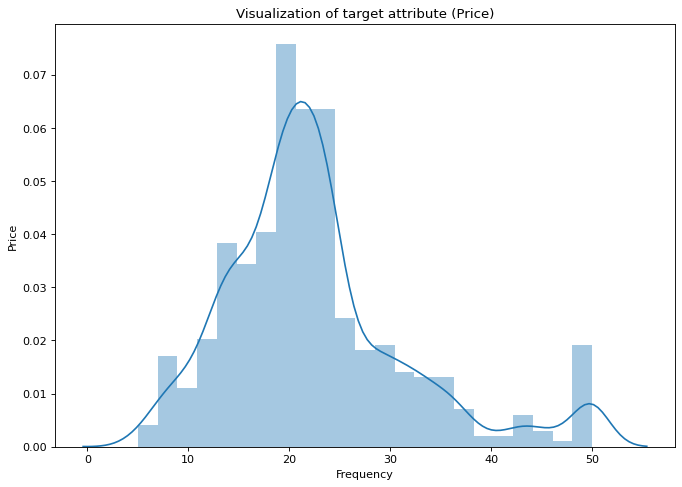

In [24]:
# Visualize distribution of target attribute-
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

sns.distplot(y, kde = True)

plt.title("Visualization of target attribute (Price)")
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.show()

In [46]:
# Create a dataset for visualization-
data = pd.concat([X, pd.Series(y)], axis = 1)

In [47]:
data.shape

(506, 14)

In [49]:
# data.columns = list(boston.feature_names, boston.target)
col_names = list(boston.feature_names)
col_names.append('Price')

data.columns = col_names

In [50]:
print("\nFirst five rows:\n{0}\n".format(data.head()))


First five rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  



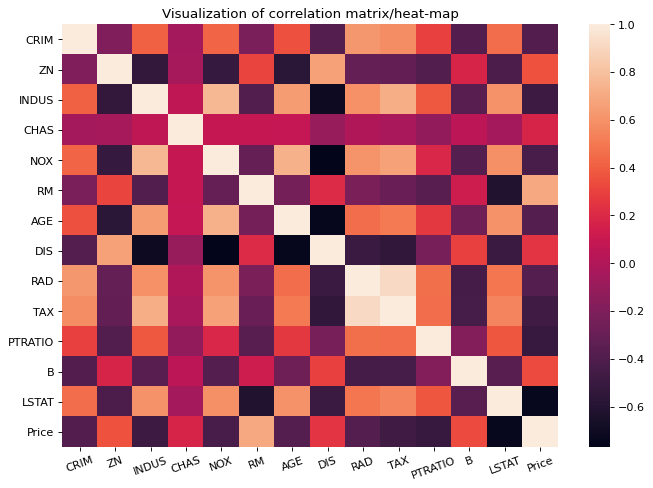

In [131]:
# Compute correlation matrix of features-
data_corr = data.corr()

# Visualize heatmap/correlation matrix-
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

sns.heatmap(data_corr)

plt.xticks(rotation = 20)
plt.title("Visualization of correlation matrix/heat-map")
plt.show()

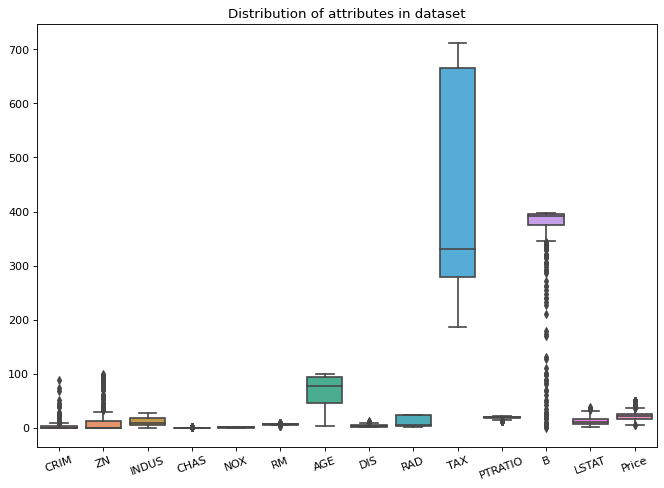

In [53]:
# Visualize distribution of attributes in dataset-
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
sns.boxplot(data=data)

plt.title("Distribution of attributes in dataset")
plt.xticks(rotation = 20)
plt.show()

### Machine Learning Regression models:

In [65]:
# Instantiate a LightGBM regression model-
lgb_reg = lgb.LGBMRegressor()

In [66]:
# Train model on training data-
lgb_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
# Make predictions using trained model-
y_pred_lgb = lgb_reg.predict(X_test)

In [68]:
# Get model metrics on testing dataset-
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

In [69]:
print("\nLightGBM regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_lgb, mae_lgb, r2_lgb
))


LightGBM regressor model metrics:
MSE = 11.5109, MAE = 2.3909 & R-2 score = 0.8832



In [70]:
# Instantiate a LightGBM regression model-
xgb_reg = xgb.XGBRegressor()

In [71]:
# Train model on training data-
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [73]:
# Make predictions using trained model-
y_pred_xgb = xgb_reg.predict(X_test)

In [74]:
# Get model metrics on testing dataset-
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [75]:
print("\nXGBoost regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_xgb, mae_xgb, r2_xgb
))


XGBoost regressor model metrics:
MSE = 8.6374, MAE = 2.2198 & R-2 score = 0.9124



In [78]:
# Instantiate a CatBoost regression model-
catboost_reg = cgb.CatBoostRegressor()

In [79]:
# Train model on training data-
catboost_reg.fit(X_train, y_train, verbose=False)

In [80]:
# Make predictions using trained model-
y_pred_catboost = catboost_reg.predict(X_test)

In [81]:
# Get model metrics on testing dataset-
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

In [82]:
print("\nCatBoost regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_catboost, mae_catboost, r2_catboost
))


CatBoost regressor model metrics:
MSE = 8.3727, MAE = 2.0316 & R-2 score = 0.9151



### Observation:

The ranking of the regressors for this experiment is as follows-

1. CatBoost
1. XGBoost
1. LightGBM


### Perform _hyper-parameter_ optimizations:

### Objection function:

_Objective function_ will return negative of l1 (absolute loss, alias = mean_absolute_error, mae).

Objective will be to maximize output of the provided objective function. You can use also use l2, l2_root or poisson.

### LightGBM Regression Hyperparameter optimization:

In [83]:
# Create training dataset for LightGBM regressor-
dtrain = lgb.Dataset(data=X, label=y)   

In [84]:
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):

    '''
    Objective function using l1 or mean absolute error
    '''
    
    # Default parameters-
    params = {
        'application':'regression','num_iterations': 5000,
        'learning_rate':0.05, 'early_stopping_round':50,
        'metric':'l1'}
    
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight

    # Use 5-fold Cross-Validation-
    cv_result = lgb.cv(
        params, dtrain, nfold=5,
        stratified=False, verbose_eval =None,
        metrics=['l1']
    )
        
    # Return negative of l1 or MAE objective function
    return -np.min(cv_result['l1-mean'])


### Search Space:

Specify the hyperparameters and their range of values for which the desired hyperparameter optimization has to be performed. In this particular example, 6 of the many hyperparameters are demonstrated.

In [86]:
# Hyperparamters which have to be optimized-
hyperparams = {
    'num_leaves': (45, 60),
    'feature_fraction': (0.1, 0.9),
    'bagging_fraction': (0.8, 1),
    'max_depth': (9, 13 ),
    'min_split_gain': (0.001, 0.1),
    'min_child_weight': (30, 50)
}

### Bayesian Optimization model:

Now, a Bayesian Optimization function which will perform hyperparameter optimization is defined. This will optimize (maximize) the defined objective function.

The addition of _init_points_ and _n_iter_ parameters will be equivalent to the total number of optimization rounds.

In [87]:
# Define a bayesian optimization model-
bayesian_optimizer = BayesianOptimization(hyp_lgbm, hyperparams)

In [88]:
# Optimize
bayesian_optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  1        | -2.571    |  0.8553   |  0.4913   |  10.96    |  44.93    |  0.04171  |  45.85    |
|  2        | -2.553    |  0.8357   |  0.254    |  9.696    |  43.6     |  0.02477  |  46.46    |
|  3        | -2.549    |  0.8625   |  0.8412   |  11.8     |  42.27    |  0.06409  |  47.93    |
|  4        | -2.655    |  0.8312   |  0.1772   |  12.37    |  45.83    |  0.0463   |  49.76    |
|  5        | -2.681    |  0.9772   |  0.166    |  11.12    |  42.93    |  0.007695 |  56.13    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        | -2.363    |  0.9941   |  0.8473   |  12.95    |  30.0     |  0.001152 |  45.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        | -2.398    |  0.9685   |  0.7574   |  9.256    |  30.25    |  0.0637   |  45.27    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        | -2.566    |  0.8      |  0.1      |  13.0     |  30.0     |  0.001    |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        | -2.404    |  0.8238   |  0.4846   |  12.91    |  30.46    |  0.006741 |  45.01    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       | -2.395    |  1.0      |  0.9      |  9.0      |  30.0     |  0.001    |  52.44    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       | -2.419    |  0.9265   |  0.8914   |  12.7     |  30.09    |  0.09073  |  51.44    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       | -2.416    |  1.0      |  0.9      |  13.0     |  30.78    |  0.1      |  46.07    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       | -2.638    |  0.8      |  0.9      |  9.0      |  50.0     |  0.001    |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       | -2.395    |  0.8      |  0.9      |  9.0      |  30.0     |  0.001    |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       | -2.395    |  0.8      |  0.9      |  9.0      |  30.0     |  0.001    |  56.53    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  16       | -2.378    |  0.8      |  0.9      |  12.56    |  30.0     |  0.001    |  45.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  17       | -2.477    |  1.0      |  0.9      |  9.0      |  34.33    |  0.09436  |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  18       | -2.378    |  1.0      |  0.9      |  11.83    |  30.0     |  0.001    |  45.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  19       | -2.428    |  0.9964   |  0.3555   |  12.75    |  30.08    |  0.04039  |  46.59    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  20       | -2.638    |  1.0      |  0.9      |  9.0      |  50.0     |  0.001    |  45.0     |


In [90]:
# 'best' hyperparameters found-
bayesian_optimizer.max['params']

{'bagging_fraction': 0.994149858459215,
 'feature_fraction': 0.8472748786296614,
 'max_depth': 12.946526686088648,
 'min_child_weight': 30.0,
 'min_split_gain': 0.0011522492809133685,
 'num_leaves': 45.0}

In [96]:
# Define a 'best' LightGBM regressor using hyperparameters from above-
lgb_reg_best = lgb.LGBMRegressor(
    bagging_fraction = bayesian_optimizer.max['params']['bagging_fraction'],
    feature_fraction = bayesian_optimizer.max['params']['feature_fraction'],
    max_depth = int(round(bayesian_optimizer.max['params']['max_depth'])),
    min_child_weight = bayesian_optimizer.max['params']['min_child_weight'],
    min_split_gain = bayesian_optimizer.max['params']['min_split_gain'],
    num_leaves = int(round(bayesian_optimizer.max['params']['num_leaves'])),
)

In [97]:
# Train model on training data-
lgb_reg_best.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.994149858459215, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.8472748786296614, importance_type='split',
              learning_rate=0.1, max_depth=12, min_child_samples=20,
              min_child_weight=30.0, min_split_gain=0.0011522492809133685,
              n_estimators=100, n_jobs=-1, num_leaves=45, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [98]:
# Make predictions using trained model-
y_pred_lgb_best = lgb_reg_best.predict(X_test)

In [99]:
# Get model metrics on testing dataset-
mae_lgb_best = mean_absolute_error(y_test, y_pred_lgb_best)
mse_lgb_best = mean_squared_error(y_test, y_pred_lgb_best)
r2_lgb_best = r2_score(y_test, y_pred_lgb_best)

In [100]:
print("\nLightGBM 'best' regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_lgb_best, mae_lgb_best, r2_lgb_best
))


LightGBM 'best' regressor model metrics:
MSE = 10.7541, MAE = 2.3144 & R-2 score = 0.8909



In [101]:
print("\nLightGBM (base model) regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_lgb, mae_lgb, r2_lgb
))


LightGBM (base model) regressor model metrics:
MSE = 11.5109, MAE = 2.3909 & R-2 score = 0.8832



### Observation:

_Hyperparameterized_ LightGBM regressor performs slightly better than the _base_ regressor.

### Objective function for _R-Squared_ metric:

R-squared metric is not available for LightGBM and XGBoost regressors. Therefore, if the need to use it arises, you have to define it on your own.

In [113]:
# Create training dataset for LightGBM regressor (R2-metric)-
dtrain_r2 = lgb.Dataset(data=X, label=y, free_raw_data=False)

In [102]:
def lgb_r2_score(preds, dtrain):
    # Objective function for R-Squared metric
    
    labels = dtrain.get_label()
    
    return 'r2', r2_score(labels, preds), True


In [116]:
def hyp_lgbm_r2(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
    '''
    Objective function using R-Squared metric
    '''
 
    # Default parameters-
    params = {
        'application':'regression','num_iterations': 100,
        'learning_rate':0.05, 'early_stopping_round':50,
        'metric':'lgb_r2_score'}
    
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight

    # Using 5-fold Cross-Validation-
    cv_results = lgb.cv(
        params, dtrain_r2, nfold=5,
        categorical_feature=[], stratified=False,
        verbose_eval =None, feval=lgb_r2_score)
    
    # print("\nResults of k-fold CV are:\n{0}\n".format(cv_results))
    
    return np.max(cv_results['r2-mean'])
    

In [117]:
# Define bayesion optimizer for r2 metric-
bayesian_optimizer_r2 = BayesianOptimization(hyp_lgbm_r2, hyperparams)

In [118]:
# Perform optimization-
bayesian_optimizer_r2.maximize(init_points=5, n_iter=15)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/basic.py:1294: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  warnings.warn('categorical_feature in Dataset is overridden.\n'


|  1        |  0.7812   |  0.9109   |  0.7275   |  10.46    |  49.82    |  0.06981  |  57.24    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  2        |  0.7834   |  0.8686   |  0.7998   |  10.73    |  49.0     |  0.02903  |  46.07    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  3        |  0.791    |  0.8422   |  0.5605   |  10.66    |  41.65    |  0.05269  |  54.09    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  4        |  0.7994   |  0.8019   |  0.3357   |  12.88    |  40.88    |  0.02132  |  51.56    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  5        |  0.8043   |  0.9157   |  0.2769   |  9.719    |  30.36    |  0.06825  |  46.76    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        |  0.8099   |  0.8542   |  0.8355   |  12.85    |  30.35    |  0.09126  |  57.65    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        |  0.762    |  0.9759   |  0.1494   |  12.9     |  30.4     |  0.0222   |  45.29    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        |  0.7633   |  0.8      |  0.1      |  9.0      |  30.0     |  0.001    |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        |  0.7938   |  1.0      |  0.9      |  13.0     |  43.53    |  0.1      |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       |  0.8097   |  0.9705   |  0.8792   |  9.21     |  30.0     |  0.02174  |  53.13    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       |  0.8071   |  0.9879   |  0.888    |  9.071    |  36.45    |  0.04777  |  45.23    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       |  0.788    |  0.8063   |  0.8935   |  12.95    |  49.94    |  0.09876  |  52.33    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       |  0.745    |  0.8      |  0.1      |  13.0     |  50.0     |  0.1      |  60.0     |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       |  0.807    |  0.9771   |  0.8926   |  12.92    |  35.39    |  0.008408 |  53.95    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       |  0.8106   |  0.8809   |  0.8999   |  9.026    |  30.59    |  0.04433  |  45.12    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  16       |  0.7955   |  0.9891   |  0.8972   |  9.201    |  44.89    |  0.02313  |  48.84    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  17       |  0.8106   |  0.8124   |  0.8917   |  9.385    |  30.99    |  0.02088  |  48.74    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  18       |  0.8099   |  0.9679   |  0.8202   |  12.99    |  30.73    |  0.006445 |  59.97    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  19       |  0.804    |  0.8211   |  0.8581   |  12.75    |  33.91    |  0.09492  |  59.92    |


/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/arjun/.local/lib/python3.8/site-packages/lightgbm/engine.py:508: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  20       |  0.8097   |  0.9937   |  0.8417   |  9.063    |  30.03    |  0.07242  |  49.37    |


In [119]:
# 'best' hyperparameters found-
bayesian_optimizer_r2.max['params']

{'bagging_fraction': 0.8808500027128063,
 'feature_fraction': 0.8998621947163398,
 'max_depth': 9.026158253642144,
 'min_child_weight': 30.585220348193026,
 'min_split_gain': 0.04432913010699776,
 'num_leaves': 45.117976686052494}

In [120]:
# Define a 'best' LightGBM regressor (R2-metric) using hyperparameters from above-
lgb_reg_best_r2 = lgb.LGBMRegressor(
    bagging_fraction = bayesian_optimizer_r2.max['params']['bagging_fraction'],
    feature_fraction = bayesian_optimizer_r2.max['params']['feature_fraction'],
    max_depth = int(round(bayesian_optimizer_r2.max['params']['max_depth'])),
    min_child_weight = bayesian_optimizer_r2.max['params']['min_child_weight'],
    min_split_gain = bayesian_optimizer_r2.max['params']['min_split_gain'],
    num_leaves = int(round(bayesian_optimizer_r2.max['params']['num_leaves'])),
)



In [121]:
# Train model on training data-
lgb_reg_best_r2.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8808500027128063, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.8998621947163398, importance_type='split',
              learning_rate=0.1, max_depth=9, min_child_samples=20,
              min_child_weight=30.585220348193026,
              min_split_gain=0.04432913010699776, n_estimators=100, n_jobs=-1,
              num_leaves=45, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [122]:
# Make predictions using trained model-
y_pred_lgb_best_r2 = lgb_reg_best_r2.predict(X_test)

In [123]:
# Get model metrics on testing dataset-
mae_lgb_best_r2 = mean_absolute_error(y_test, y_pred_lgb_best_r2)
mse_lgb_best_r2 = mean_squared_error(y_test, y_pred_lgb_best_r2)
r2_lgb_best_r2 = r2_score(y_test, y_pred_lgb_best_r2)

In [124]:
print("\nLightGBM 'best' regressor model (R2-metric) metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_lgb_best_r2, mae_lgb_best_r2, r2_lgb_best_r2
))


LightGBM 'best' regressor model (R2-metric) metrics:
MSE = 11.1793, MAE = 2.4044 & R-2 score = 0.8866



In [125]:
print("\nLightGBM (base model) regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_lgb, mae_lgb, r2_lgb
))


LightGBM (base model) regressor model metrics:
MSE = 11.5109, MAE = 2.3909 & R-2 score = 0.8832



In [126]:
print("\nLightGBM 'best' regressor model (MAE) metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_lgb_best, mae_lgb_best, r2_lgb_best
))


LightGBM 'best' regressor model (MAE) metrics:
MSE = 10.7541, MAE = 2.3144 & R-2 score = 0.8909



### Observation:

For this particular dataset and hyperparameters, it seems that _mean absolute error_ is a better metric as compared to _R-Squared_ metric.

### CatBoost Regression Hyperparameter optimization:

In [127]:
def cat_hyp(depth, bagging_temperature):
    '''
    Objective function to optimize two hyperparameters viz., 'depth' and
    'bagging_temperature' for R-Squared metric
    '''
    
    params = {
        "iterations": 100, "learning_rate": 0.05,
        "eval_metric": "R2", "verbose": False
    }
    
    params[ "depth"] = int(round(depth)) 
    params["bagging_temperature"] = bagging_temperature
    
    # List for categorical fetures/attributes-
    cat_feat = []
    
    # Create dataset for CatBoost regression-
    cv_dataset = cgb.Pool(
        data = X, label = y,
        cat_features = cat_feat
    )

    # Perform 5-fold Cross-Validation-
    scores = cgb.cv(
        cv_dataset, params,
        fold_count = 5)
    
    # Return the optimized (and, maximized) R-2 metric-
    return np.max(scores['test-R2-mean'])

In [128]:
# Search space for CatBoost regression
# We only have two hyperparameters due to the objective function
# also having two hyperparameters-
hyperparams_catboost = {
    'depth': (5, 8),
    'bagging_temperature': (3,10)
}

In [129]:
# Define a bayesian optimizer for CatBoost regressor-
bayesian_optimizer_cat = BayesianOptimization(cat_hyp, hyperparams_catboost)

In [130]:
# Perform hyperparameter optimization-
bayesian_optimizer_cat.maximize(init_points=3, n_iter=7)

|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
|  1        |  0.8112   |  4.902    |  7.015    |
|  2        |  0.8212   |  9.836    |  6.264    |
|  3        |  0.8297   |  8.859    |  5.103    |
|  4        |  0.8297   |  9.949    |  5.017    |
|  5        |  0.8297   |  9.892    |  5.003    |
|  6        |  0.8297   |  9.854    |  5.001    |
|  7        |  0.8297   |  9.889    |  5.022    |
|  8        |  0.8297   |  9.914    |  5.004    |
|  9        |  0.8297   |  9.713    |  5.001    |
|  10       |  0.8297   |  9.929    |  5.007    |


In [132]:
# Get the 'best' hyperparameters found-
bayesian_optimizer_cat.max['params']

{'bagging_temperature': 8.859091168009439, 'depth': 5.102707918664679}

In [136]:
# Define a 'best' CatBoost regressor using the hyperparameters found from above-
catboost_reg_best = cgb.CatBoostRegressor(
    bagging_temperature = bayesian_optimizer_cat.max['params']['bagging_temperature'],
    depth = int(round(bayesian_optimizer_cat.max['params']['depth']))
)

In [138]:
# Train model on training data-
catboost_reg_best.fit(X_train, y_train, verbose=False)

In [139]:
# Make predictions using trained model-
y_pred_catboost_best = catboost_reg_best.predict(X_test)

In [140]:
# Get model metrics on testing dataset-
mae_catboost_best = mean_absolute_error(y_test, y_pred_catboost_best)
mse_catboost_best = mean_squared_error(y_test, y_pred_catboost_best)
r2_catboost_best = r2_score(y_test, y_pred_catboost_best)

In [141]:
print("\nCatBoost 'best' regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_catboost_best, mae_catboost_best, r2_catboost_best
))


CatBoost 'best' regressor model metrics:
MSE = 8.2976, MAE = 2.0613 & R-2 score = 0.9158



In [142]:
print("\nCatBoost (base model) regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_catboost, mae_catboost, r2_catboost
))


CatBoost (base model) regressor model metrics:
MSE = 8.3727, MAE = 2.0316 & R-2 score = 0.9151



In [144]:
def cat_hyp_mae(depth, bagging_temperature):
    '''
    Objective function to optimize two hyperparameters viz., 'depth' and
    'bagging_temperature' for Mean Absolute Error metric
    '''
    
    params = {
        "iterations": 100, "learning_rate": 0.05,
        "eval_metric": "MAE", "verbose": False
    }
    
    params[ "depth"] = int(round(depth)) 
    params["bagging_temperature"] = bagging_temperature
    
    # List for categorical fetures/attributes-
    cat_feat = []
    
    # Create dataset for CatBoost regression-
    cv_dataset = cgb.Pool(
        data = X, label = y,
        cat_features = cat_feat
    )

    # Perform 5-fold Cross-Validation-
    scores = cgb.cv(
        cv_dataset, params,
        fold_count = 5)
    
    # Return the optimized (and, maximized) R-2 metric-
    return np.max(scores['test-MAE-mean'])

In [145]:
# Define a bayesian optimizer for CatBoost regressor-
bayesian_optimizer_cat_mae = BayesianOptimization(cat_hyp_mae, hyperparams_catboost)

In [146]:
# Perform hyperparameter optimization (MAE metric)-
bayesian_optimizer_cat_mae.maximize(init_points=3, n_iter=7)

|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
|  1        |  21.54    |  6.749    |  5.308    |
|  2        |  21.54    |  3.514    |  5.462    |
|  3        |  21.55    |  8.964    |  6.242    |
|  4        |  21.6     |  3.108    |  7.995    |
|  5        |  21.6     |  6.512    |  8.0      |
|  6        |  21.6     |  5.2      |  7.997    |
|  7        |  21.6     |  4.456    |  7.998    |
|  8        |  21.6     |  4.848    |  7.998    |
|  9        |  21.6     |  3.0      |  8.0      |
|  10       |  21.6     |  4.95     |  8.0      |


In [147]:
# Get the 'best' hyperparameters found-
bayesian_optimizer_cat_mae.max['params']

{'bagging_temperature': 3.10784395217901, 'depth': 7.994767801858222}

In [150]:
# Define a 'best' CatBoost regressor (MAE) using the hyperparameters found from above-
catboost_reg_best_mae = cgb.CatBoostRegressor(
    bagging_temperature = bayesian_optimizer_cat_mae.max['params']['bagging_temperature'],
    depth = int(round(bayesian_optimizer_cat_mae.max['params']['depth']))
)



In [151]:
# Train model on training data-
catboost_reg_best_mae.fit(X_train, y_train, verbose = False)

In [152]:
# Make predictions using trained model-
y_pred_catboost_best_mae = catboost_reg_best_mae.predict(X_test)

In [154]:
# Get model metrics on testing dataset-
mae_catboost_best_mae = mean_absolute_error(y_test, y_pred_catboost_best_mae)
mse_catboost_best_mae = mean_squared_error(y_test, y_pred_catboost_best_mae)
r2_catboost_best_mae = r2_score(y_test, y_pred_catboost_best_mae)

In [157]:
print("\nCatBoost 'best' (MAE metric) regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_catboost_best_mae, mae_catboost_best_mae, r2_catboost_best_mae
))

print("\nCatBoost 'best' (R2 metric) regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_catboost_best, mae_catboost_best, r2_catboost_best
))


CatBoost 'best' (MAE metric) regressor model metrics:
MSE = 8.5690, MAE = 2.0547 & R-2 score = 0.9131


CatBoost 'best' (R2 metric) regressor model metrics:
MSE = 8.2976, MAE = 2.0613 & R-2 score = 0.9131



### Observation:

Both of the _CatBoost_ regressors are pretty close in terms of metrics viz., Mean Absolute Error, Mean Squared Error and R-2 score!

### Visualization of _feature importance_ using regressor:

In [166]:
feature_imp = pd.DataFrame(sorted(zip(catboost_reg_best.feature_importances_, X.columns)), columns=['Value','Feature'])

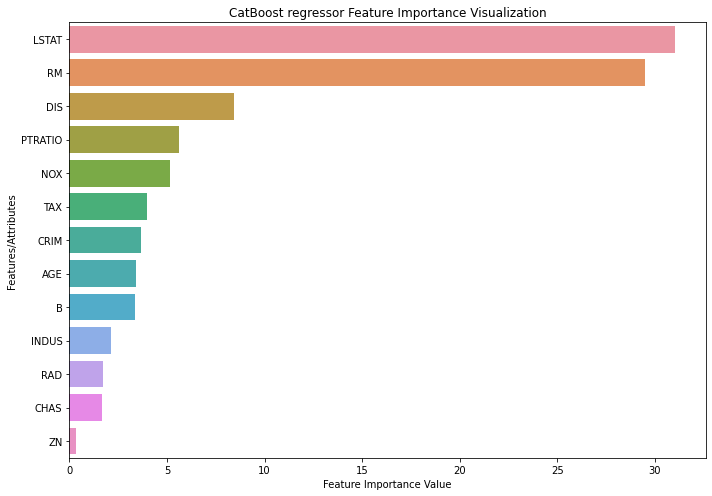

In [171]:
# Visualization of CatBoost regressor's feature importance-
plt.figure(figsize=(10, 7))

sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

plt.title('CatBoost regressor Feature Importance Visualization')
plt.xlabel("Feature Importance Value")
plt.ylabel("Features/Attributes")
plt.tight_layout()
plt.show()

In [172]:
feature_imp_mae = pd.DataFrame(sorted(zip(catboost_reg_best_mae.feature_importances_, X.columns)), columns=['Value','Feature'])

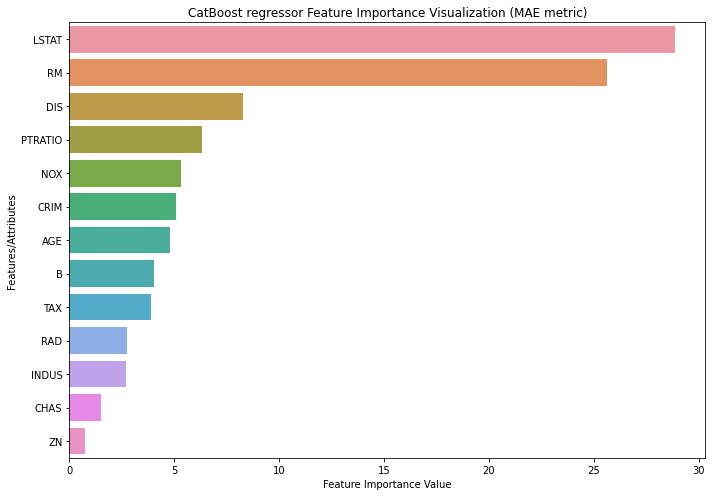

In [173]:
# Visualization of CatBoost regressor's feature importance-
plt.figure(figsize=(10, 7))

sns.barplot(x="Value", y="Feature", data=feature_imp_mae.sort_values(by="Value", ascending=False))

plt.title('CatBoost regressor Feature Importance Visualization (MAE metric)')
plt.xlabel("Feature Importance Value")
plt.ylabel("Features/Attributes")
plt.tight_layout()
plt.show()

### XGBoost Regressor Hyperparameter tuning:

In [174]:
# Define dataset for XGBoost regressor-
dtrain_xgb = xgb.DMatrix(X, y, feature_names=X.columns.values)

### Parameters:

1. By including _eval_metric_ parameter, small values of _early_stopping_rounds_ parameter (less than or equal to 10) should be used. Because if the value of the specified evaluation metric does not improve for a given number of early stopping rounds, then the training will be terminated.

1. By excluding _eval_metric_ parameter for hyperparameter tuning, _early_stopping_rounds_ parameter should be used with larger number (of say, 10 or more). However, this should be less than _num_boost_rounds_ parameters, because the training process will be halted at the specified early stoping round.

In [186]:
def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma ):
    '''
    Objective function for MAE metric
    '''
    
    hyper_params = {
        'n_estimators': 300, 'eta': 0.05,
        'objective': 'reg:linear', 'eval_metric':'mae',
        'silent': 1
     }
    
    hyper_params['max_depth'] = int(round(max_depth))
    hyper_params['subsample'] = max(min(subsample, 1), 0)
    hyper_params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    hyper_params['min_child_weight'] = int(min_child_weight)
    hyper_params['gamma'] = max(gamma, 0)
    
    # Use 5-fold Cross-Validation-
    scores = xgb.cv(
        hyper_params, dtrain_xgb,
        num_boost_round = 1000, verbose_eval = False,
        early_stopping_rounds = 10,
        # feval = xgb_r2,
        maximize = True,
        nfold = 5)
    
    # Returns maximum of MAE metric-
    return  scores['test-mae-mean'].iloc[-1]


# 'feval' is to create your own customized evaluation metric.
# 'eval_metric' is for built in metrics xgboost package is implementing.

In [187]:
hyperparams_xgb ={
    'min_child_weight':(14, 20),
    'gamma':(0, 5),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.1, 1),
    'max_depth': (5, 10)
}

In [188]:
# Define a bayesian optimization model-
bayesian_optimizer_xgb = BayesianOptimization(hyp_xgb, hyperparams_xgb)

In [189]:
# Perform hyperparameter optimization-
bayesian_optimizer_xgb.maximize(init_points = 5, n_iter = 15)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        |  20.95    |  0.4128   |  3.003    |  6.612    |  14.85    |  0.958    |
|  2        |  20.96    |  0.5453   |  2.097    |  9.999    |  15.78    |  0.6405   |
|  3        |  20.96    |  0.6405   |  3.467    |  6.014    |  19.43    |  0.6804   |
|  4        |  20.95    |  0.2688   |  2.673    |  5.675    |  18.22    |  0.7368   |
|  5        |  20.96    |  0.5839   |  3.847    |  7.032    |  19.19    |  0.7143   |
|  6        |  20.95    |  0.7749   |  4.924    |  9.896    |  19.9     |  0.9133   |
|  7        |  20.97    |  0.7571   |  4.687    |  9.904    |  14.38    |  0.5035   |
|  8        |  20.96    |  0.9716   |  4.859    |  5.38     |  14.66    |  0.6027   |
|  9        |  20.94    |  0.1904   |  4.926    |  5.408    |  19.84    |  0.7008   |
|  10       |  20.95    |  0.9677   |  0.03606  |  7.3

In [190]:
# 'best' hyperparameters found-
bayesian_optimizer_xgb.max['params']

{'colsample_bytree': 0.7571145683379401,
 'gamma': 4.68721716346003,
 'max_depth': 9.90352323573413,
 'min_child_weight': 14.383155276670664,
 'subsample': 0.5035327003699241}

In [191]:
# Initialize a 'best' XGBoost regressor-
xgb_reg_best = xgb.XGBRFRegressor(
    colsample_bytree = bayesian_optimizer_xgb.max['params']['colsample_bytree'],
    gamma = bayesian_optimizer_xgb.max['params']['gamma'],
    max_depth = int(round(bayesian_optimizer_xgb.max['params']['max_depth'])),
    min_child_weight = bayesian_optimizer_xgb.max['params']['min_child_weight'],
    subsample = bayesian_optimizer_xgb.max['params']['subsample'],
)

In [192]:
# Train model on training data-
xgb_reg_best.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=0.7571145683379401,
               gamma=4.68721716346003, gpu_id=-1, importance_type='gain',
               interaction_constraints=None, learning_rate=1, max_delta_step=0,
               max_depth=10, min_child_weight=14.383155276670664, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=0,
               num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, reg_alpha=0, reg_lambda=1e-05,
               scale_pos_weight=1, subsample=0.5035327003699241,
               tree_method=None, validate_parameters=False, verbosity=None)

In [193]:
# Make predictions using trained model-
y_pred_xgb_best = xgb_reg_best.predict(X_test)

In [194]:
# Get model metrics on testing dataset-
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb_best)
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

In [196]:
print("\nXGBoost 'best' regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_xgb_best, mae_xgb_best, r2_xgb_best
))

print("\nXGBoost (base model) regressor model metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R-2 score = {2:.4f}\n".format(
    mse_xgb, mae_xgb, r2_xgb
))



XGBoost 'best' regressor model metrics:
MSE = 17.2659, MAE = 2.9489 & R-2 score = 0.8248


XGBoost (base model) regressor model metrics:
MSE = 8.6374, MAE = 2.2198 & R-2 score = 0.9124



### Observation:

The hyperparmater tuned XGBoost regressor performs worse than the base model! Therefore pointing out that hyperparmater tuning can not always provide the desired performance boost.